# Test using PytorchCV

Repo from https://github.com/osmr/imgclsmob/blob/master/pytorch/.

In [2]:
from pytorchcv.model_provider import get_model
import torch
from torch.autograd import Variable

import torchvision.datasets as D
import matplotlib.pyplot as plt

import numpy as np

%load_ext autoreload
%autoreload 2

```
pspnet_resnetd50b_cityscapes : NO
pspnet_resnetd101b_cityscapes : RAM problem

fcn8sd_resnetd50b_cityscapes : NO
fcn8sd_resnetd101b_cityscapes: NO

deeplabv3_resnetd50b_cityscapes : NO
deeplabv3_resnetd101b_cityscapes : NO

icnet_resnetd50b_cityscapes : Input size problem

fastscnn_cityscapes : input size problem

cgnet_cityscapes : NO
dabnet_cityscapes : NO

sinet_cityscapes : YES

danet_resnetd50b_cityscapes : RAM problem
danet_resnetd101b_cityscapes : RAM problem

fpenet_cityscapes: NO
ctxnet_cityscapes : NO
lednet_cityscapes:NO
esnet_cityscapes:NO
edanet_cityscapes:NO
enet_cityscapes:NO
erfnet_cityscapes:NO
linknet_cityscapes:NO
segnet_cityscapes: NO
unet_cityscapes:NO
sqnet_cityscapes: NO
```

## Data loading

In [4]:
dataset = D.Cityscapes('HRNet/data/cityscapes', split="val", target_type='semantic')

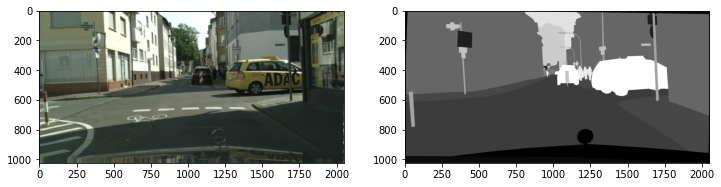

In [5]:
fig,ax = plt.subplots(ncols=2, figsize=(12,8))
ax[0].imshow(dataset[0][0])
ax[1].imshow(dataset[0][1], cmap='gray')

In [6]:
dataset[0][0].size

(2048, 1024)

In [7]:
test = torch.Tensor(np.array([np.array(dataset[0][0])]))
test = torch.permute(test, (0, 3, 1, 2))
test.shape

torch.Size([1, 3, 1024, 2048])

## Model Testing 

In [8]:
net = get_model("sinet_cityscapes", pretrained=True)
net.eval()
x = Variable(torch.randn(1, 3, 2048, 1024))
y = net(test)

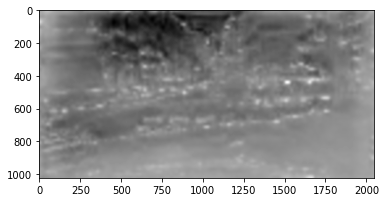

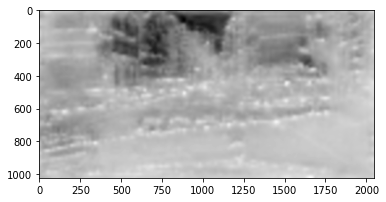

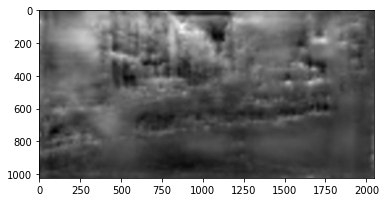

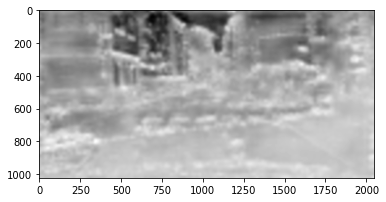

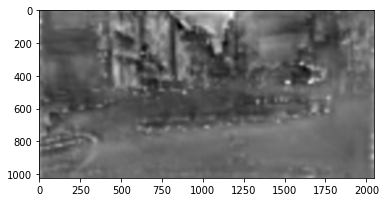

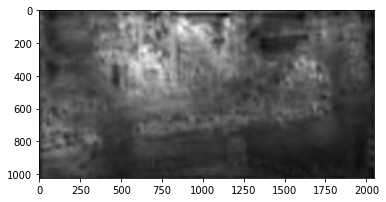

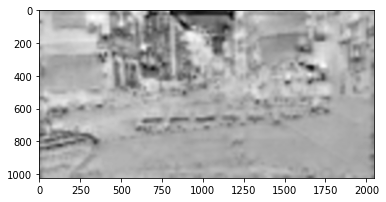

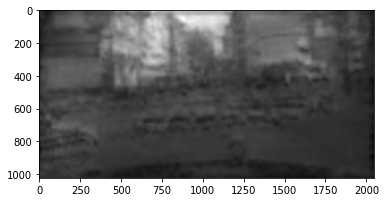

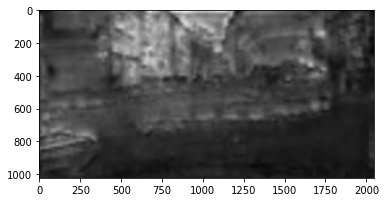

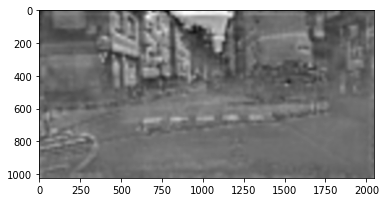

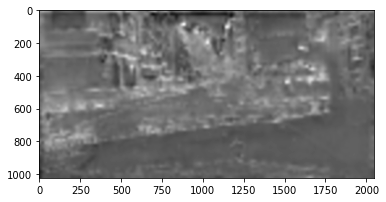

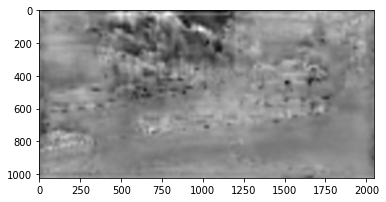

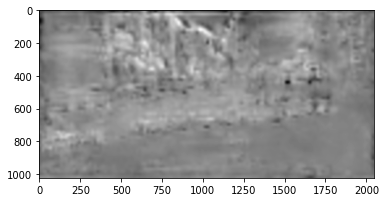

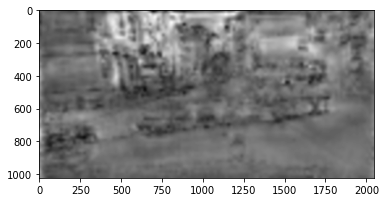

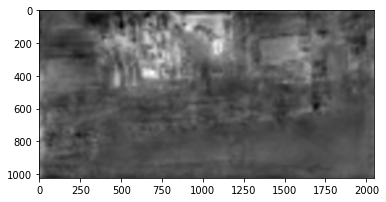

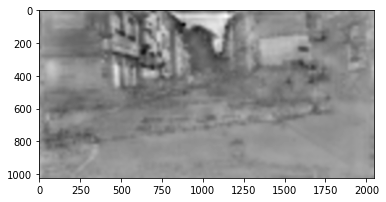

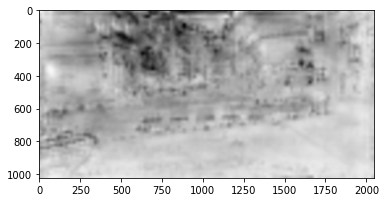

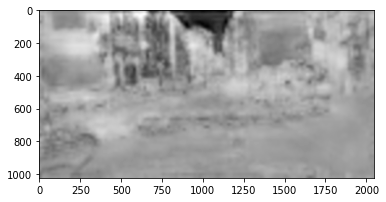

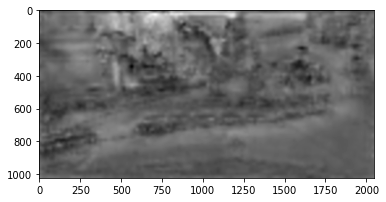

In [9]:
n, c, h, w = y.shape

for i in range(c):
    plt.imshow(y[0][i].detach().numpy(), cmap='gray')
    plt.show()

In [79]:
colors_data = [ [0,  0,  0],
          [128, 64,128],
          [244, 35,232],
          [70, 70, 70],
          [102,102,156],
          [190,153,153],
          [153,153,153],
          [250,170, 30],
          [250,170, 30],
          [107,142, 35],
          [152,251,152],
          [ 70,130,180],
          [220, 20, 60],
          [255,  0,  0],
          [ 0,  0,142],
          [  0,  0, 70],
          [  0,  0, 70],
          [  0, 80,100],
          [  0,  0,230],
          [119, 11, 32] ]

In [1]:
def convert_to_RGB(y):
    """
    Identifies the class by taking the argmax across values.
    Replaces the class id by 
    """
    # n_classes = 19
    n_classes = y.shape[1]
    
    colors = np.array(colors_data[:n_classes])
    print(f"Using {len(colors)} classes.")
    
    channels = y.permute(0, 2, 3, 1)
    idtfd = channels.argmax(dim=3).numpy()

    print("Showing image 0")
    imgs = colors[idtfd]
    plt.imshow(imgs[0])
    
    return imgs, idtfd

Using 19 classes.
Showing image 0


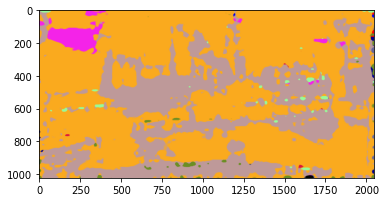

In [84]:
_, _ = convert_to_RGB(y)